<a href="https://colab.research.google.com/github/Smarth2005/Energy-Demand-Forecasting/blob/main/notebook/Testing_different_Regression_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving feature_engineered_data.csv to feature_engineered_data.csv


In [ ]:
import pandas as pd

# Replace with your actual filename
df = pd.read_csv('feature_engineered_data.csv')
df.head()


,Hourly Demand Met (in MW),datetime,temp,dew,humidity,windgust,windspeed,sealevelpressure,cloudcover,visibility,...,month_name_Feb,month_name_Jan,month_name_Jul,month_name_Jun,month_name_Mar,month_name_May,month_name_Nov,month_name_Oct,month_name_Sep,week_type_Weekend
0,138212.80,2023-01-01 00:00:00,11.0,10.0,93.55,2.639057,1.856298,1020.0,0.0,1.098612,...,False,True,False,False,False,False,False,False,False,True
1,134620.74,2023-01-01 01:00:00,10.0,9.0,93.50,2.660260,1.856298,1020.0,0.0,1.098612,...,False,True,False,False,False,False,False,False,False,True
2,131384.79,2023-01-01 02:00:00,8.6,7.6,93.83,2.660260,0.000000,1019.5,0.0,0.788457,...,False,True,False,False,False,False,False,False,False,True
3,130602.47,2023-01-01 03:00:00,10.0,9.0,93.50,2.687847,0.000000,1019.0,0.0,1.098612,...,False,True,False,False,False,False,False,False,False,True
4,133288.97,2023-01-01 04:00:00,9.0,9.0,100.00,2.580217,1.856298,1019.0,0.0,0.693147,...,False,True,False,False,False,False,False,False,False,True


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

target_column = 'Hourly Demand Met (in MW)'
X = df.drop(columns=[target_column])
y = df[target_column]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

datetime_train = X_train['datetime'].copy()
datetime_test = X_test['datetime'].copy()

# Drop from training features
X_train = X_train.drop(columns=['datetime'], errors='ignore')
X_test = X_test.drop(columns=['datetime'], errors='ignore')

# Instantiate and fit the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test set
lr_preds = lr_model.predict(X_test)

# Evaluation
lr_mae = mean_absolute_error(y_test, lr_preds)
lr_mse = mean_squared_error(y_test, lr_preds)
lr_rmse = lr_mse ** 0.5
lr_r2 = r2_score(y_test, lr_preds)

print("Linear Regression Metrics:")
print(f"MAE: {lr_mae:.4f}")
print(f"MSE: {lr_mse:.4f}")
print(f"RMSE: {lr_rmse:.4f}")
print(f"R² Score: {lr_r2:.4f}")


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
import pandas as pd

# Load your uploaded dataset
df = pd.read_csv('feature_engineered_data.csv')

# Show the total number of missing values per column
missing_values = df.isnull().sum()

# Filter columns with at least one missing value
missing_columns = missing_values[missing_values > 0]

# Display the result
print("🔍 Columns with missing values:")
print(missing_columns)


🔍 Columns with missing values:
rolling_mean_24hr     23
lag_1                  1
lag_24                24
lag_168              168
rolling_std_24hr      23
rolling_mean          92
dtype: int64


In [ ]:
df = df.fillna(df.mean(numeric_only=True))


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

target_column = 'Hourly Demand Met (in MW)'
X = df.drop(columns=[target_column])
y = df[target_column]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

datetime_train = X_train['datetime'].copy()
datetime_test = X_test['datetime'].copy()

# Drop from training features
X_train = X_train.drop(columns=['datetime'], errors='ignore')
X_test = X_test.drop(columns=['datetime'], errors='ignore')

# Instantiate and fit the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test set
lr_preds = lr_model.predict(X_test)

# Evaluation
lr_mae = mean_absolute_error(y_test, lr_preds)
lr_mse = mean_squared_error(y_test, lr_preds)
lr_rmse = lr_mse ** 0.5
lr_r2 = r2_score(y_test, lr_preds)

print("Linear Regression Metrics:")
print(f"MAE: {lr_mae:.4f}")
print(f"MSE: {lr_mse:.4f}")
print(f"RMSE: {lr_rmse:.4f}")
print(f"R² Score: {lr_r2:.4f}")


Linear Regression Metrics:
MAE: 2789.2579
MSE: 13458078.9908
RMSE: 3668.5255
R² Score: 0.9664


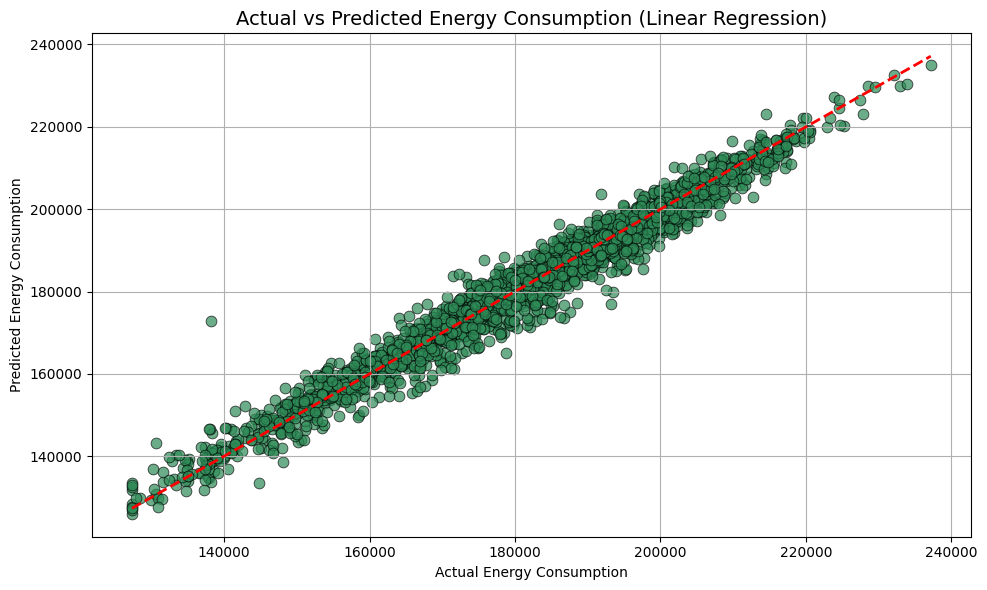

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict using the trained Linear Regression model
lr_preds = lr_model.predict(X_test)

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=lr_preds, color='seagreen', s=60, edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # 45-degree line
plt.title('Actual vs Predicted Energy Consumption (Linear Regression)', fontsize=14)
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
dt_preds = dt_model.predict(X_test)
dt_mae = mean_absolute_error(y_test, dt_preds)
dt_mse = mean_squared_error(y_test, dt_preds)
dt_rmse = dt_mse ** 0.5
dt_r2 = r2_score(y_test, dt_preds)

print(f"Decision Tree MAE: {dt_mae:.4f}")
print(f"Decision Tree RMSE: {dt_rmse:.4f}")
print(f"Decision Tree R2 Score: {dt_r2:.4f}")


Decision Tree MAE: 2286.5941
Decision Tree RMSE: 3329.7746
Decision Tree R2 Score: 0.9723


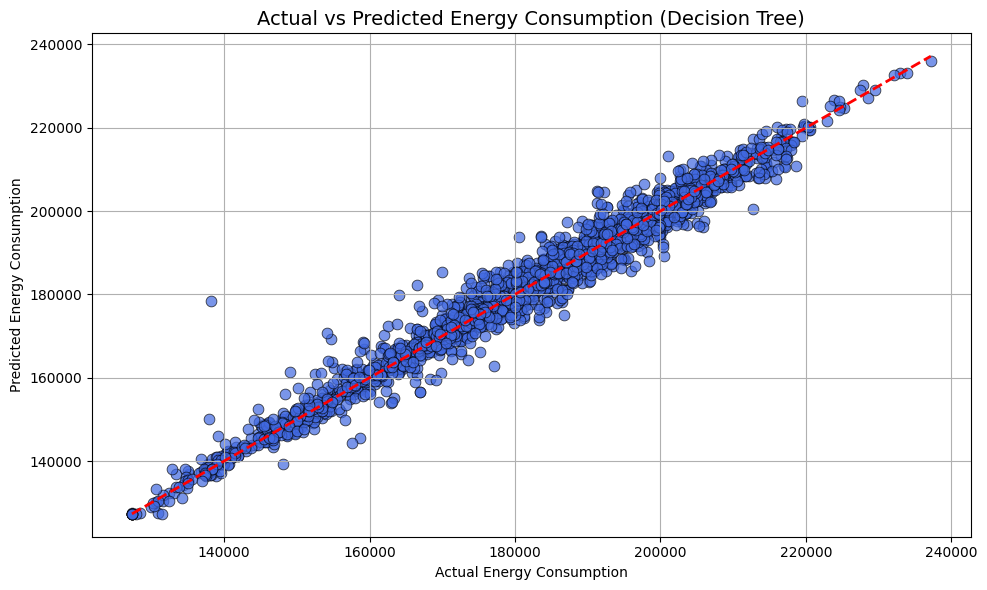

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict using the trained Decision Tree model
dt_preds = dt_model.predict(X_test)

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=dt_preds, color='royalblue', s=60, edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # 45-degree line
plt.title('Actual vs Predicted Energy Consumption (Decision Tree)', fontsize=14)
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.grid(True)
plt.tight_layout()
plt.show()


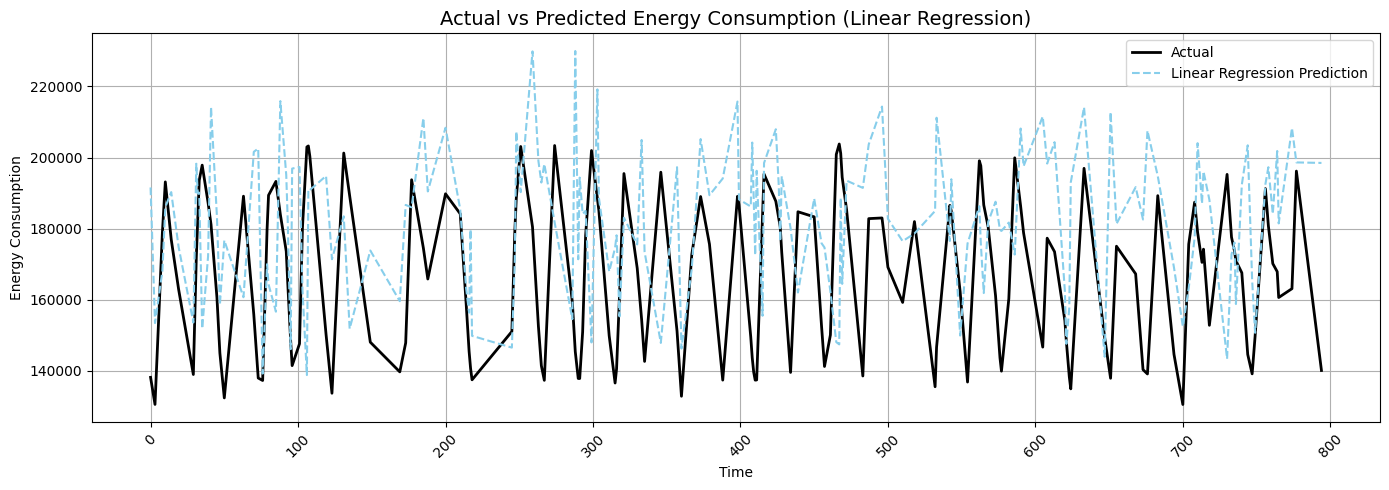

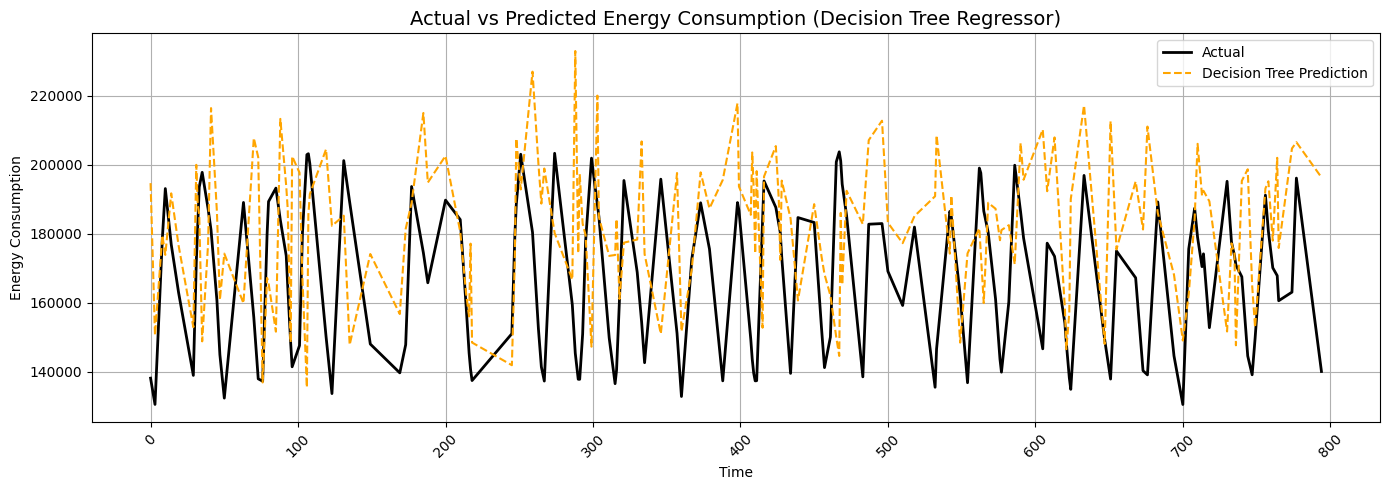

In [ ]:
# Sort by datetime index
y_test = y_test.sort_index()
import pandas as pd

# Convert predictions to Series
lr_preds = pd.Series(lr_preds, index=y_test.index)
dt_preds = pd.Series(dt_preds, index=y_test.index)# Convert predictions to Series with same index
lr_preds = pd.Series(lr_preds, index=y_test.index)
dt_preds = pd.Series(dt_preds, index=y_test.index)
subset_hours = 168
y_test_subset = y_test.iloc[:subset_hours]
lr_preds_subset = lr_preds.iloc[:subset_hours]
dt_preds_subset = dt_preds.iloc[:subset_hours]
# Plot: Linear Regression
plt.figure(figsize=(14, 5))
plt.plot(y_test_subset.index, y_test_subset.values, label='Actual', color='black', linewidth=2)
plt.plot(y_test_subset.index, lr_preds_subset, label='Linear Regression Prediction', color='skyblue', linestyle='--')
plt.title('Actual vs Predicted Energy Consumption (Linear Regression)', fontsize=14)
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot: Decision Tree Regressor
plt.figure(figsize=(14, 5))
plt.plot(y_test_subset.index, y_test_subset.values, label='Actual', color='black', linewidth=2)
plt.plot(y_test_subset.index, dt_preds_subset, label='Decision Tree Prediction', color='orange', linestyle='--')
plt.title('Actual vs Predicted Energy Consumption (Decision Tree Regressor)', fontsize=14)
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

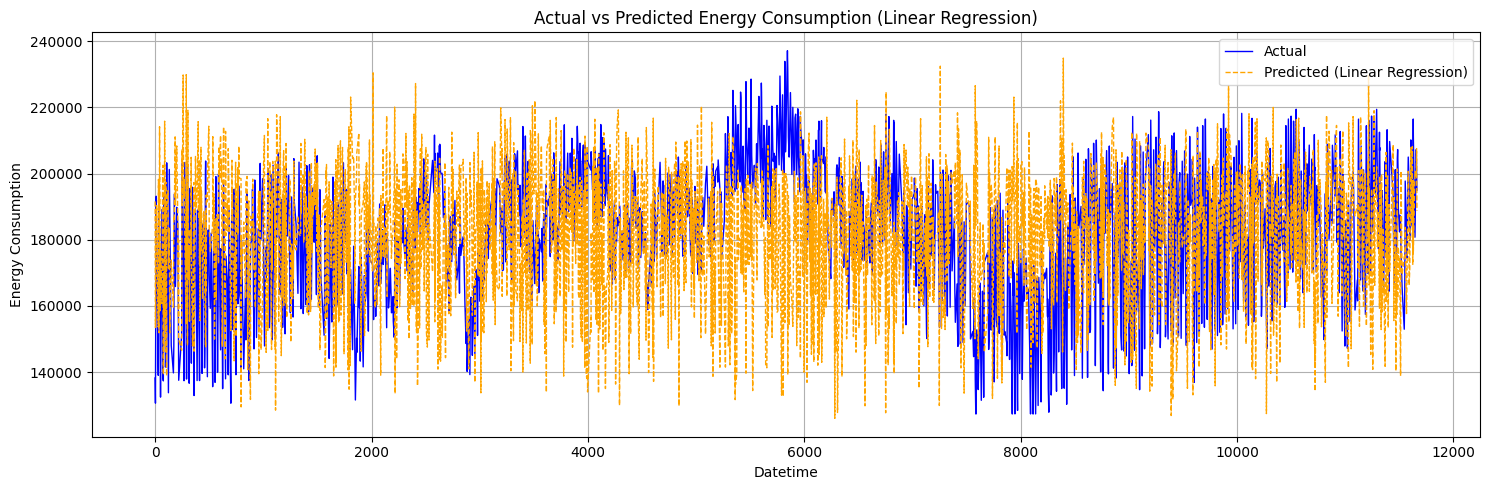

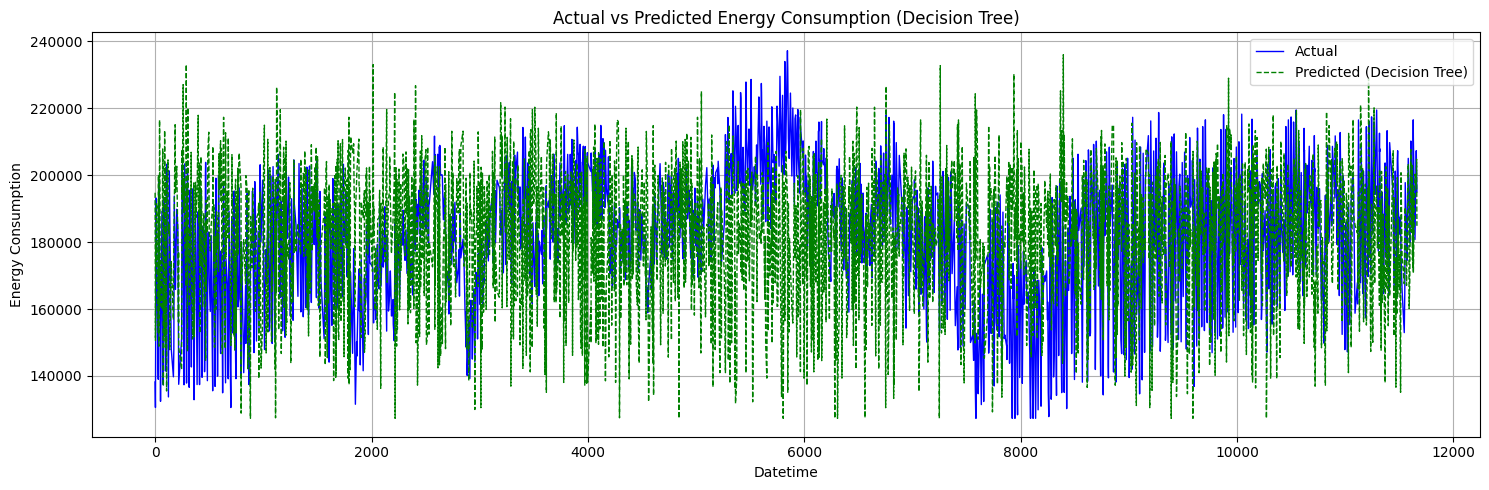

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert predictions to Series with the same index as y_test
lr_preds_series = pd.Series(lr_preds, index=y_test.index)
dt_preds_series = pd.Series(dt_preds, index=y_test.index)

# Plot for Linear Regression
plt.figure(figsize=(15, 5))
plt.plot(y_test.sort_index(), label='Actual', color='blue', linewidth=1)
plt.plot(lr_preds_series.sort_index(), label='Predicted (Linear Regression)', linestyle='--', color='orange', linewidth=1)
plt.title("Actual vs Predicted Energy Consumption (Linear Regression)")
plt.xlabel("Datetime")
plt.ylabel("Energy Consumption")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot for Decision Tree
plt.figure(figsize=(15, 5))
plt.plot(y_test.sort_index(), label='Actual', color='blue', linewidth=1)
plt.plot(dt_preds_series.sort_index(), label='Predicted (Decision Tree)', linestyle='--', color='green', linewidth=1)
plt.title("Actual vs Predicted Energy Consumption (Decision Tree)")
plt.xlabel("Datetime")
plt.ylabel("Energy Consumption")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


IndexError: list index out of range

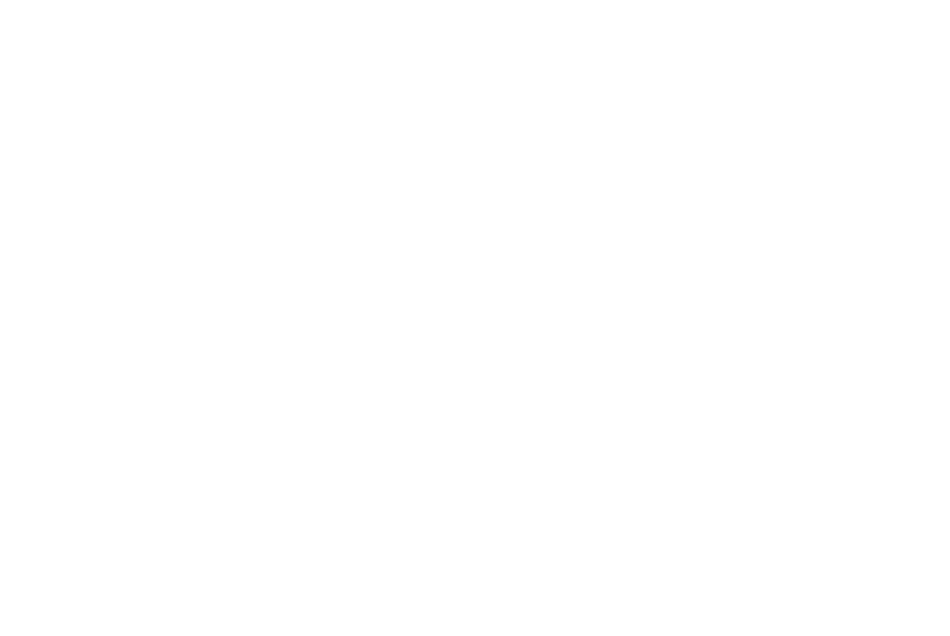

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.datasets import make_regression

# Step 1: Generate synthetic data for regression (you can replace this with your own dataset)
#X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)

# Step 2: Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize the DecisionTreeRegressor and train the model
#model = DecisionTreeRegressor(random_state=42)
#model.fit(X_train, y_train)

# Step 4: Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, filled=True, feature_names=['Feature'], rounded=True, fontsize=12)
plt.title('Decision Tree Regressor Visualization')
plt.show()

# Optional: Print the decision tree as text
from sklearn.tree import export_text
tree_rules = export_text(model, feature_names=['Feature'])
print(tree_rules)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
rf_preds = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_preds)
rf_rmse = rf_mse ** 0.5
rf_r2 = r2_score(y_test, rf_preds)

print(f"Random Forest RMSE: {rf_rmse:.4f}")
print(f"Random Forest R2 Score: {rf_r2:.4f}")


Random Forest RMSE: 2305.5321
Random Forest R2 Score: 0.9867


In [ ]:
!pip install --upgrade scikit-learn


In [ ]:
import sklearn
print(sklearn.__version__)


1.6.1


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb


In [ ]:
# Create the XGBRegressor model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05)

# Train the model
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)


In [ ]:
# Calculate RMSE (Root Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Calculate R² (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

RMSE: 1599.3034430137984
R² Score: 0.993620151849405


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Load your data
df = pd.read_csv("feature_engineered_data.csv")

# Define features (X) and target (y)
X = df.drop('Hourly Demand Met (in MW)', axis=1)
y = df['Hourly Demand Met (in MW)']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

datetime_train = X_train['datetime'].copy()
datetime_test = X_test['datetime'].copy()

# Drop from training features
X_train = X_train.drop(columns=['datetime'], errors='ignore')
X_test = X_test.drop(columns=['datetime'], errors='ignore')

# Initialize the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror')

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'min_child_weight': [1, 3, 5]
}

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Calculate R² (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


Best Hyperparameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 500, 'subsample': 0.9}
RMSE: 2199.2406448512393
R² Score: 0.9879359228988845


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Initialize models
lr_model = LinearRegression()
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)

# Fit models
lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = {
    "Linear Regression": lr_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

results = []

for name, model in models.items():
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    rmse = mse ** 0.5
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    results.append((name, rmse, mae, r2))


In [ ]:
import pandas as pd

results_df = pd.DataFrame(results, columns=["Model", "RMSE", "MAE", "R² Score"])
print(results_df.sort_values(by="RMSE"))


               Model         RMSE          MAE  R² Score
3            XGBoost  1892.254019  1226.239732  0.991069
2      Random Forest  2305.532098  1579.052668  0.986742
1      Decision Tree  3329.774648  2286.594128  0.972345
0  Linear Regression  3668.525452  2789.257904  0.966432


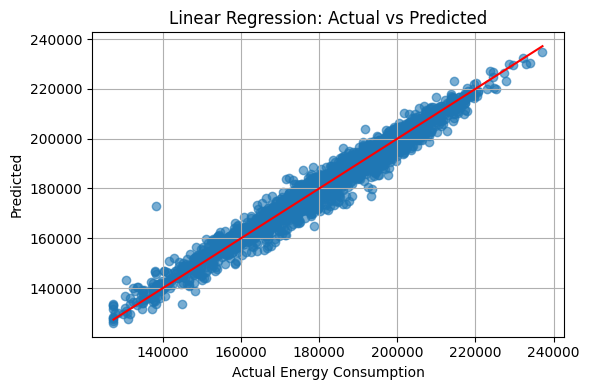

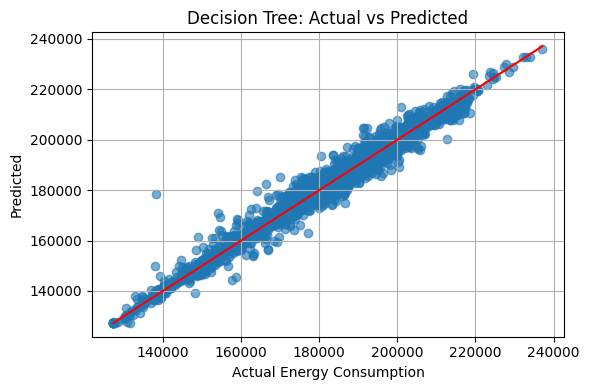

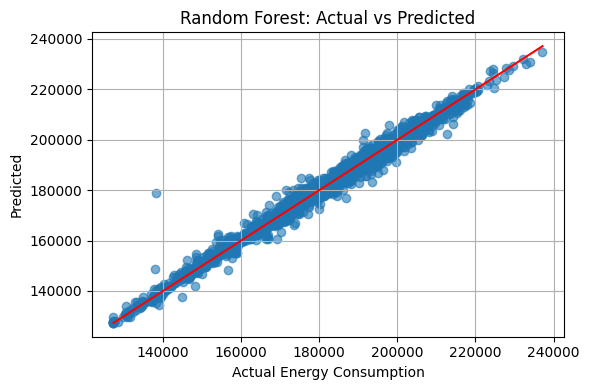

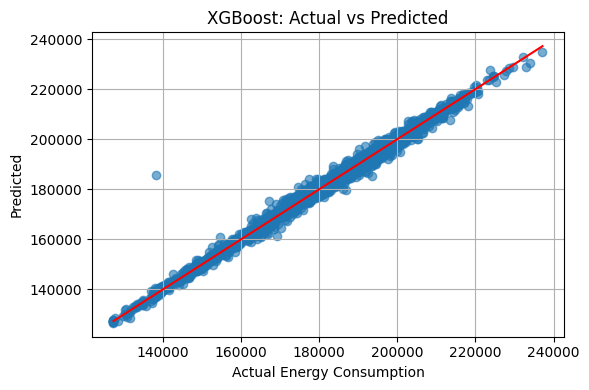

In [ ]:
import matplotlib.pyplot as plt

for name, model in models.items():
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, model.predict(X_test), alpha=0.6)
    plt.xlabel("Actual Energy Consumption")
    plt.ylabel("Predicted")
    plt.title(f"{name}: Actual vs Predicted")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


<ipython-input-43-f12fb490f7ba>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="RMSE", palette="crest")


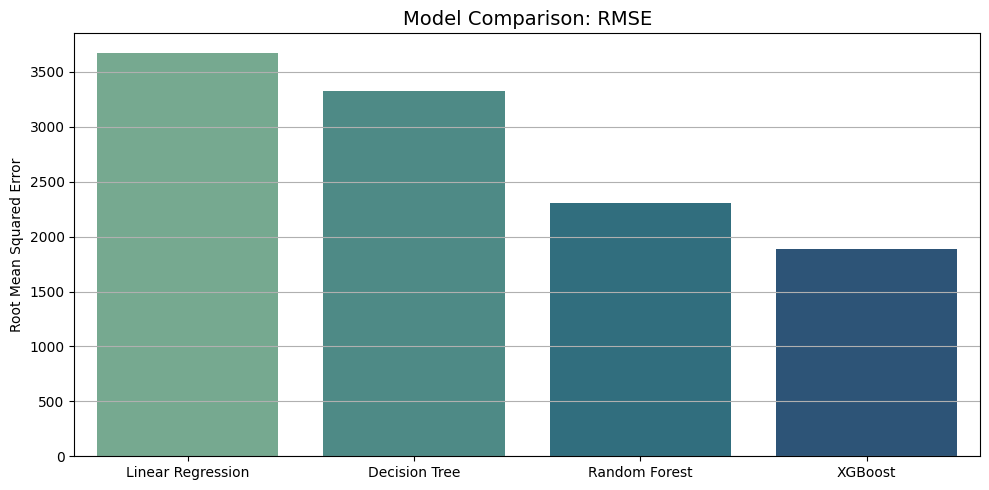

<ipython-input-43-f12fb490f7ba>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="R² Score", palette="flare")


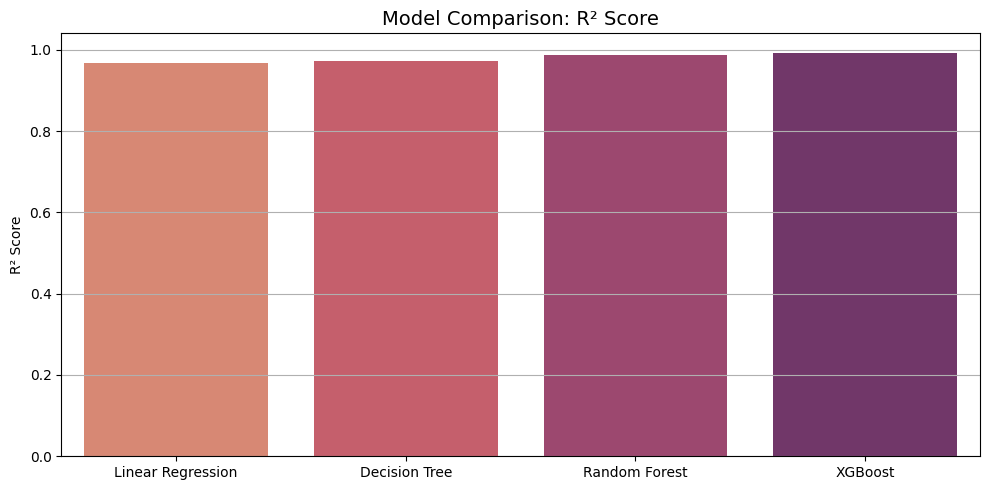

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have this results DataFrame
# results_df = pd.DataFrame([
#     ("Linear Regression",  rmse_lr,  mae_lr,  r2_lr),
#     ("Decision Tree",      rmse_dt,  mae_dt,  r2_dt),
#     ("Random Forest",      rmse_rf,  mae_rf,  r2_rf),
#     ("XGBoost",            rmse_xgb, mae_xgb, r2_xgb),
# ], columns=["Model", "RMSE", "MAE", "R² Score"])

# --- Bar plot for RMSE ---
plt.figure(figsize=(10, 5))
sns.barplot(data=results_df, x="Model", y="RMSE", palette="crest")
plt.title("Model Comparison: RMSE", fontsize=14)
plt.ylabel("Root Mean Squared Error")
plt.xlabel("")
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()

# --- Bar plot for R² Score ---
plt.figure(figsize=(10, 5))
sns.barplot(data=results_df, x="Model", y="R² Score", palette="flare")
plt.title("Model Comparison: R² Score", fontsize=14)
plt.ylabel("R² Score")
plt.xlabel("")
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()


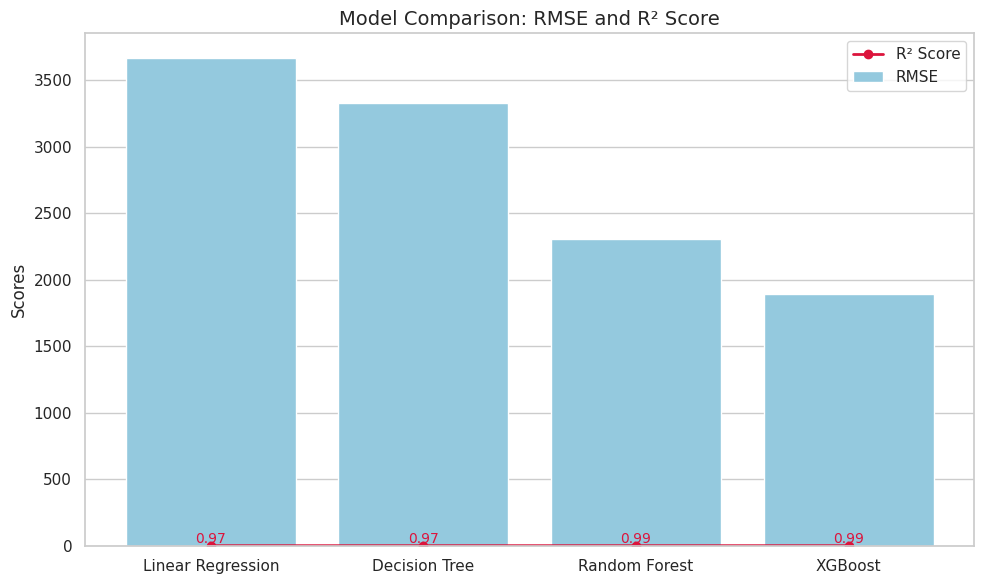

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample structure of results_df
# results_df = pd.DataFrame({
#     "Model": ["Linear Regression", "Decision Tree", "Random Forest", "XGBoost"],
#     "RMSE": [rmse_lr, rmse_dt, rmse_rf, rmse_xgb],
#     "R2": [r2_lr, r2_dt, r2_rf, r2_xgb]
# })

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Bar plot for RMSE
sns.barplot(data=results_df, x="Model", y="RMSE", color='skyblue', label="RMSE")

# Line plot for R² score
plt.plot(results_df["Model"], results_df["R² Score"], color='crimson', marker='o', linewidth=2, label="R² Score")

# Annotate R² values
for i, r2 in enumerate(results_df["R² Score"]):
    plt.text(i, results_df["R² Score"][i] + 0.01, f"{r2:.2f}", ha='center', va='bottom', color='crimson', fontsize=10)

# Titles and labels
plt.title("Model Comparison: RMSE and R² Score", fontsize=14)
plt.ylabel("Scores")
plt.xlabel("")
plt.legend()
plt.tight_layout()
plt.show()
